# Natural Language Processing

<div>
    <ul>Steps involved in NLP:
        <li>Load data
            <li> Tokenize
                <li>Ngram
                    <li>Frequency distribution
                        <li>Stop Words
                            <li>Remove Punctuation
                                <li>Remove tags
                                    <li>Remove numbers
                                        <li> Regular Expression
                                            <li>Replacing string
                                                <li>Stemming
                                                    <li>Lemmatization
                                                        <li>Count Vectorizer
                                                            <li>TF-IDF
                                                                <li>Data Cleaning
                                                                    <li>Word Cloud
                                                                        <li>Token Tags
                                                                            <li>POS: spacy+NLTK , visualization
                                                                                <li>Named Entity Recognition (NER), visualization
                                                                                    <li>Sentiment Anaylsis : Vader, a tool
                                                                                        <li>LDA (For unsupervised Learning)topic modelling; Documemts>>>Topics>>>Words
                                                                                            </ul>
</div>                                                                                            

### Importing libraries


In [352]:
import pandas as pd
import numpy as np
import os
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',100)

### Loading Data 

In [2]:
data=pd.read_excel(r"C:\Users\.hp\Desktop\EdWisor\NLP\tweets.xlsx")

In [3]:
data.shape

(265, 2)

In [4]:
data.head()

,Tweet,Class
0,If the press would cover me accurately & honor...,Yes
1,I am thrilled to nominate Dr. @RealBenCarson a...,Yes
2,their country (the U.S. doesn't tax them) or t...,Yes
3,Did China ask us if it was OK to devalue their...,Yes
4,".@FoxNews will be re-running ""Objectified: Don...",Yes


In [5]:
#nltk.download()

### Tokenization

Tokenization is done to break the text into words or sentences. Purpose : to make things easy for machine to evaluate on text.

In [6]:
from  nltk.tokenize import sent_tokenize,word_tokenize

In [7]:
sampl1= "All work and no play makes jack a dull boy. All work and no play"

In [8]:
word_sampl1=word_tokenize(sampl1)
print (word_sampl1)

['All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', '.', 'All', 'work', 'and', 'no', 'play']


In [9]:
sent_sampl1=sent_tokenize(sampl1)
print(sent_sampl1)

['All work and no play makes jack a dull boy.', 'All work and no play']


### Ngrams

<div>
    Ngrams makes the tokens of "n" words together. If we want to keep few words together(eg: Hello Sam, red car, etc) together, we use Ngrams. Just like tokenizations bt with power of grouping. <br>
    <ul>Types:
        <li>Bigram
            <li>Trigram
                <li>n=5 is the max limit(convention)

In [10]:
from nltk import ngrams

In [11]:
n=13
trigram=ngrams(sampl1.split(),n)

In [12]:
for i in trigram:
    print(i)

('All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy.', 'All', 'work', 'and')
('work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy.', 'All', 'work', 'and', 'no')
('and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy.', 'All', 'work', 'and', 'no', 'play')


### Frequency Distribution

In [13]:
len(word_sampl1)

16

In [14]:
from nltk.probability import FreqDist

In [15]:
f=FreqDist(word_sampl1)
print (f)

<FreqDist with 11 samples and 16 outcomes>


In [16]:
f['All']

2

In [17]:
for i in word_sampl1:
    print(i,f[i])
    

All 2
work 2
and 2
no 2
play 2
makes 1
jack 1
a 1
dull 1
boy 1
. 1
All 2
work 2
and 2
no 2
play 2


In [18]:
f.most_common(10)

[('All', 2),
 ('work', 2),
 ('and', 2),
 ('no', 2),
 ('play', 2),
 ('makes', 1),
 ('jack', 1),
 ('a', 1),
 ('dull', 1),
 ('boy', 1)]

### Stopwords

<div>
    Stopwords are the words that are commonly occurring and are useless for analysis.<br>
    There are 2 bags. 1 bag is full of shit(Stopwords). Other one is our bag that has mix of all sorts of things. We filter out the content of our bag by only selecting those items that are not similar to shit bag(1st bag)

In [19]:
from nltk.corpus import stopwords

In [20]:
#check the words
stopwords.words("English")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
stop_words=set(stopwords.words("English"))

In [22]:
filtered=[]
filtered=[a for a in word_sampl1 if not a in stop_words]
print(filtered)

['All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'All', 'work', 'play']


### Punctuations

In [23]:
from string import punctuation

In [24]:
sampl2="Hello!+ how <are> you\\ doing|?"

In [25]:
filtered_punc="".join(w for w in sampl2 if not w in punctuation)
print("Original text: ",sampl2)
print("Filtered text: ",filtered_punc)

Original text:  Hello!+ how <are> you\ doing|?
Filtered text:  Hello how are you doing


### Removing Numbers

In [26]:
sampl3="That box contains 200 toffees, out of which 10 are blue, 70 are green,100 are black and rest are white"

In [27]:
filtered_num="".join(w for w in sampl3 if not w.isdigit() )

In [28]:
print ("Original text: ", sampl3)
print("Filtered text: ",filtered_num)

Original text:  That box contains 200 toffees, out of which 10 are blue, 70 are green,100 are black and rest are white
Filtered text:  That box contains  toffees, out of which  are blue,  are green, are black and rest are white


### Stemming

<div> Definition: Decomposing the words to its root by <b>removing affixes.</b><br>
    <ul>Types:
        <li>Porter Stemming : uses Suffix Striping; fast and easy
            <li>Snowball Stemming(English Stemmer or Porter2 Stemmer): better version of Porter Stemming. Best among three.
                <li>Lancaster Stemming : uses iterative algo which works on rule. LancasterStemmer produces an even shorter stem than porter because of iterations and over-stemming is occurred.
            

In [29]:
sampl4='This is a Demoes Texting for NLP using NLTK. Full forms of NLTK is Natural Language Toolkit'

Porter Stemming

In [30]:
from nltk.stem import PorterStemmer

In [31]:
word_tokenized=word_tokenize(sampl4)
print(word_tokenized)

['This', 'is', 'a', 'Demoes', 'Texting', 'for', 'NLP', 'using', 'NLTK', '.', 'Full', 'forms', 'of', 'NLTK', 'is', 'Natural', 'Language', 'Toolkit']


In [32]:
stemmed_sent_p=" ".join(PorterStemmer().stem(word) for word in word_tokenized)
print("Original: ",sampl4)
print ("Stemmed Sentence: ",stemmed_sent_p)

Original:  This is a Demoes Texting for NLP using NLTK. Full forms of NLTK is Natural Language Toolkit
Stemmed Sentence:  thi is a demo text for nlp use nltk . full form of nltk is natur languag toolkit


Snowball Stemming

In [33]:
from nltk.stem import SnowballStemmer

In [34]:
stemmed_sent_s=" ".join(SnowballStemmer("english").stem(word) for word in word_tokenized)
print("Original: ",sampl4)
print ("Stemmed Sentence: ",stemmed_sent_s)

Original:  This is a Demoes Texting for NLP using NLTK. Full forms of NLTK is Natural Language Toolkit
Stemmed Sentence:  this is a demo text for nlp use nltk . full form of nltk is natur languag toolkit


Lancaster Stemming

In [35]:
from nltk.stem import LancasterStemmer

In [36]:
stemmed_sent_l=" ".join(LancasterStemmer().stem(word) for word in word_tokenized)
print("Original: ",sampl4)
print ("Stemmed Sentence: ",stemmed_sent_l)

Original:  This is a Demoes Texting for NLP using NLTK. Full forms of NLTK is Natural Language Toolkit
Stemmed Sentence:  thi is a demo text for nlp us nltk . ful form of nltk is nat langu toolkit


Comparing all 3 stemmers:

In [37]:
print("Original: ",sampl4)
print ("Stemmed Sentence: ",stemmed_sent_p)
print ("Stemmed Sentence: ",stemmed_sent_s)
print ("Stemmed Sentence: ",stemmed_sent_l)

Original:  This is a Demoes Texting for NLP using NLTK. Full forms of NLTK is Natural Language Toolkit
Stemmed Sentence:  thi is a demo text for nlp use nltk . full form of nltk is natur languag toolkit
Stemmed Sentence:  this is a demo text for nlp use nltk . full form of nltk is natur languag toolkit
Stemmed Sentence:  thi is a demo text for nlp us nltk . ful form of nltk is nat langu toolkit


Therefore, for above sentence, snowball stemmer wins!!!

### Lemmatization

<div> The process of reducing words to lemma(dictionary form). It uses <b>WordNetDatabase(a sort of dictionary).</b>
</div>

In [38]:
from nltk.stem import WordNetLemmatizer

In [39]:
lemm=WordNetLemmatizer()

In [40]:
lemmetized=" ".join(lemm.lemmatize(w) for w in word_tokenized)
print("Original: ",sampl4)
print("Lemmatized: ",lemmetized)

Original:  This is a Demoes Texting for NLP using NLTK. Full forms of NLTK is Natural Language Toolkit
Lemmatized:  This is a Demoes Texting for NLP using NLTK . Full form of NLTK is Natural Language Toolkit


### Count Vectorizer

<div>Count Vectorizer is a type of Feature Extraction[ It means transforming arbitrary data, such as text or images, into numerical features usable for machine learning].<br>
    <ul>Common ways to extract numbers from text are:
        <li>Tokenizing : giving id to each token
            <li>Counting: counting the occurrence of tokens in each document
                <li>Normalizing: 
                 </ul>
 This specific strategy (tokenization, counting and normalization) is called the Bag of Words.<br>
 The <b>CountVectorizer </b>provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.<br>
    <ul>You can use it as follows:
        <li>Create an instance of the CountVectorizer class.
           <li>Call the fit() function in order to learn a vocabulary from one or more documents.
               <li>Call the transform() function on one or more documents as needed to encode each as a vector.
                   </ul>

 Because these vectors will contain a lot of zeros, we call them sparse. Python provides an efficient way of handling sparse vectors in the scipy.sparse package.<br>
 
 The vectors returned from a call to transform() will be sparse vectors, and you can transform them back to numpy arrays to look and better understand what is going on by calling the toarray() function.<br>


    
                 

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
corpus =["The car is driven on the road",
         "The truck is driven on the highway"]

In [43]:
cv=CountVectorizer()


In [44]:
x=cv.fit_transform(corpus)



In [45]:
x

<2x8 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [46]:
print(cv.vocabulary_)

{'the': 6, 'car': 0, 'is': 3, 'driven': 1, 'on': 4, 'road': 5, 'truck': 7, 'highway': 2}


In [47]:
print(cv.get_feature_names())

['car', 'driven', 'highway', 'is', 'on', 'road', 'the', 'truck']


In [48]:
print(x.shape)
print(x.toarray())

(2, 8)
[[1 1 0 1 1 1 2 0]
 [0 1 1 1 1 0 2 1]]


### TermFrequency-Inverse Document Frequency (TF-IDF)

<div>TF-IDF is a vectorizer which has same function as Count Vectoriser(converting text to numbers) but also adds weightage to the words acoording to their importance.<br>
    TF= (Freq of a word in sentence)/(Total number of words in that sentence)<br>
    IDF= (Total number of sentences)/(Number of sentences containing the word)<br>
    
    TF-IDF= tf * log(N/df)


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
abc=TfidfVectorizer()

In [50]:
corpus

['The car is driven on the road', 'The truck is driven on the highway']

In [51]:
tf_model=abc.fit(corpus)

In [54]:
print(tf_model.vocabulary_)

{'the': 6, 'car': 0, 'is': 3, 'driven': 1, 'on': 4, 'road': 5, 'truck': 7, 'highway': 2}


In [55]:
tf_model.get_feature_names()

['car', 'driven', 'highway', 'is', 'on', 'road', 'the', 'truck']

In [59]:
tf_model=abc.transform(corpus)

In [66]:
tf_model.shape

(2, 8)

In [62]:
tf_model.toarray()

array([[0.42471719, 0.30218978, 0.        , 0.30218978, 0.30218978,
        0.42471719, 0.60437955, 0.        ],
       [0.        , 0.30218978, 0.42471719, 0.30218978, 0.30218978,
        0.        , 0.60437955, 0.42471719]])

In [69]:
tf_model_DF=pd.DataFrame(tf_model.toarray(),columns=abc.get_feature_names())
tf_model_DF
#Sparse Matrix/Document Term Matrix

,car,driven,highway,is,on,road,the,truck
0,0.424717,0.30219,0.000000,0.30219,0.30219,0.424717,0.60438,0.000000
1,0.000000,0.30219,0.424717,0.30219,0.30219,0.000000,0.60438,0.424717


### Regex

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >\d</span></td><td>A digit</td><td>file_\d\d</td><td>file_25</td></tr>

<tr ><td><span >\w</span></td><td>Alphanumeric</td><td>\w-\w\w\w</td><td>A-b_1</td></tr>



<tr ><td><span >\s</span></td><td>White space</td><td>a\sb\sc</td><td>a b c</td></tr>



<tr ><td><span >\D</span></td><td>A non digit</td><td>\D\D\D</td><td>ABC</td></tr>

<tr ><td><span >\W</span></td><td>Non-alphanumeric</td><td>\W\W\W\W\W</td><td>*-+=)</td></tr>

<tr ><td><span >\S</span></td><td>Non-whitespace</td><td>\S\S\S\S</td><td>Yoyo</td></tr></table>

#"^"   : This expression matches the start of a string
#w : will give the first character of the first letter
#"w+" : This expression matches the alphanumeric character in the string
#"s"  : This expression is used for creating a space in the string

In [71]:
import re

In [72]:
text1="Hello I am Sr3srijan. How are you? 1243 is my otp. Use it 3 times and TYPE !!!! at the END of the sentence. #@ 12 23 <-use it"

In [90]:
print(re.findall("\w+",text1))

['Hello', 'I', 'am', 'Sr3srijan', 'How', 'are', 'you', '1243', 'is', 'my', 'otp', 'Use', 'it', '3', 'times', 'and', 'type', 'at', 'the', 'end', 'of', 'the', 'sentence', '12', '23', 'use', 'it']


In [92]:
print(re.split('\w+',text1))

['', ' ', ' ', ' ', '. ', ' ', ' ', '? ', ' ', ' ', ' ', '. ', ' ', ' ', ' ', ' ', ' ', ' !!!! ', ' ', ' ', ' ', ' ', ' ', '. #@ ', ' ', ' <-', ' ', '']


In [93]:
#Refer notes

### EXAMPLE: NLP over Tweets file

In [94]:
data.head()

,Tweet,Class
0,If the press would cover me accurately & honor...,Yes
1,I am thrilled to nominate Dr. @RealBenCarson a...,Yes
2,their country (the U.S. doesn't tax them) or t...,Yes
3,Did China ask us if it was OK to devalue their...,Yes
4,".@FoxNews will be re-running ""Objectified: Don...",Yes


In [95]:
data.columns=['Tweets','Label']

In [100]:
data.head(10)

,Tweets,Label
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes
5,The Green Party just dropped its recount suit in Pennsylvania and is losing votes in Wisconsin r...,Yes
6,expensive mistake! THE UNITED STATES IS OPEN FOR BUSINESS,Yes
7,"these companies are able to move between all 50 states, with no tax or tariff being charged. Ple...",Yes
8,"wanting to sell their product, cars, A.C. units etc., back across the border. This tax will make...",Yes
9,"without retribution or consequence, is WRONG! There will be a tax on our soon to be strong borde...",Yes


In [102]:
#Data Preprocessing:

In [103]:
from string import punctuation

In [107]:
def remove_punc(text):
    text_no_punc="".join(w for w in text if w not in punctuation)
    return text_no_punc
data['text_1_NoPunc']=data['Tweets'].apply(lambda x:remove_punc(x))
    

In [108]:
data.head()

,Tweets,Label,text_1_NoPunc
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,If the press would cover me accurately honorably I would have far less reason to tweet Sadly I ...
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept of Housing and U...
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,their country the US doesnt tax them or to build a massive military complex in the middle of the...
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,Did China ask us if it was OK to devalue their currency making it hard for our companies to comp...
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey ...


In [109]:
def remove_digit(text):
    text_no_dig="".join(w for w in text if not w.isdigit())
    return text_no_dig
data['Text_2_NoDigit']=data['text_1_NoPunc'].apply(lambda x:remove_digit(x))

In [110]:
data.head()

,Tweets,Label,text_1_NoPunc,Text_2_NoDigit
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,If the press would cover me accurately honorably I would have far less reason to tweet Sadly I ...,If the press would cover me accurately honorably I would have far less reason to tweet Sadly I ...
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept of Housing and U...,I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept of Housing and U...
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,their country the US doesnt tax them or to build a massive military complex in the middle of the...,their country the US doesnt tax them or to build a massive military complex in the middle of the...
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,Did China ask us if it was OK to devalue their currency making it hard for our companies to comp...,Did China ask us if it was OK to devalue their currency making it hard for our companies to comp...
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey ...,FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey ...


In [111]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [112]:
def toke(text):
    token=word_tokenize(text)
    return token
data['Tokenized']=data['Text_2_NoDigit'].apply(lambda x:toke(x))

In [113]:
data.head()

,Tweets,Label,text_1_NoPunc,Text_2_NoDigit,Tokenized
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,If the press would cover me accurately honorably I would have far less reason to tweet Sadly I ...,If the press would cover me accurately honorably I would have far less reason to tweet Sadly I ...,"[If, the, press, would, cover, me, accurately, honorably, I, would, have, far, less, reason, to,..."
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept of Housing and U...,I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept of Housing and U...,"[I, am, thrilled, to, nominate, Dr, RealBenCarson, as, our, next, Secretary, of, the, US, Dept, ..."
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,their country the US doesnt tax them or to build a massive military complex in the middle of the...,their country the US doesnt tax them or to build a massive military complex in the middle of the...,"[their, country, the, US, doesnt, tax, them, or, to, build, a, massive, military, complex, in, t..."
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,Did China ask us if it was OK to devalue their currency making it hard for our companies to comp...,Did China ask us if it was OK to devalue their currency making it hard for our companies to comp...,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, making, it, hard, for, our,..."
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey ...,FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey ...,"[FoxNews, will, be, rerunning, Objectified, Donald, Trump, the, ratings, hit, produced, by, the,..."


In [116]:
from nltk.corpus import stopwords

In [117]:
stop_words=set(stopwords.words('english'))

In [122]:
def stop(text):
    abc=[w for w in text if w not in stop_words]
    #abc="".join(w for w in text if w not in stop_words)
    return abc
data['Stopped']=data['Tokenized'].apply(lambda x: stop(x))

In [123]:
data.head()

,Tweets,Label,text_1_NoPunc,Text_2_NoDigit,Tokenized,Stopped
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,If the press would cover me accurately honorably I would have far less reason to tweet Sadly I ...,If the press would cover me accurately honorably I would have far less reason to tweet Sadly I ...,"[If, the, press, would, cover, me, accurately, honorably, I, would, have, far, less, reason, to,...","[If, press, would, cover, accurately, honorably, I, would, far, less, reason, tweet, Sadly, I, d..."
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept of Housing and U...,I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept of Housing and U...,"[I, am, thrilled, to, nominate, Dr, RealBenCarson, as, our, next, Secretary, of, the, US, Dept, ...","[I, thrilled, nominate, Dr, RealBenCarson, next, Secretary, US, Dept, Housing, Urban, Developmen..."
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,their country the US doesnt tax them or to build a massive military complex in the middle of the...,their country the US doesnt tax them or to build a massive military complex in the middle of the...,"[their, country, the, US, doesnt, tax, them, or, to, build, a, massive, military, complex, in, t...","[country, US, doesnt, tax, build, massive, military, complex, middle, South, China, Sea, I, dont..."
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,Did China ask us if it was OK to devalue their currency making it hard for our companies to comp...,Did China ask us if it was OK to devalue their currency making it hard for our companies to comp...,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, making, it, hard, for, our,...","[Did, China, ask, us, OK, devalue, currency, making, hard, companies, compete, heavily, tax, pro..."
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey ...,FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey ...,"[FoxNews, will, be, rerunning, Objectified, Donald, Trump, the, ratings, hit, produced, by, the,...","[FoxNews, rerunning, Objectified, Donald, Trump, ratings, hit, produced, great, Harvey, Levin, T..."


In [115]:
from nltk.stem import SnowballStemmer

In [156]:
def stem(text):
    stemmed=[SnowballStemmer('english').stem(w)for w in text ]
    return stemmed
data['Stemmed']=data['Stopped'].apply(lambda x:stem(x))

In [129]:
data.head()

,Tweets,Label,text_1_NoPunc,Text_2_NoDigit,Tokenized,Stopped,Stemmed
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,If the press would cover me accurately honorably I would have far less reason to tweet Sadly I ...,If the press would cover me accurately honorably I would have far less reason to tweet Sadly I ...,"[If, the, press, would, cover, me, accurately, honorably, I, would, have, far, less, reason, to,...","[If, press, would, cover, accurately, honorably, I, would, far, less, reason, tweet, Sadly, I, d...","[if, press, would, cover, accur, honor, i, would, far, less, reason, tweet, sad, i, dont, know, ..."
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept of Housing and U...,I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept of Housing and U...,"[I, am, thrilled, to, nominate, Dr, RealBenCarson, as, our, next, Secretary, of, the, US, Dept, ...","[I, thrilled, nominate, Dr, RealBenCarson, next, Secretary, US, Dept, Housing, Urban, Developmen...","[i, thrill, nomin, dr, realbencarson, next, secretari, us, dept, hous, urban, development…, http..."
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,their country the US doesnt tax them or to build a massive military complex in the middle of the...,their country the US doesnt tax them or to build a massive military complex in the middle of the...,"[their, country, the, US, doesnt, tax, them, or, to, build, a, massive, military, complex, in, t...","[country, US, doesnt, tax, build, massive, military, complex, middle, South, China, Sea, I, dont...","[countri, us, doesnt, tax, build, massiv, militari, complex, middl, south, china, sea, i, dont, ..."
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,Did China ask us if it was OK to devalue their currency making it hard for our companies to comp...,Did China ask us if it was OK to devalue their currency making it hard for our companies to comp...,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, making, it, hard, for, our,...","[Did, China, ask, us, OK, devalue, currency, making, hard, companies, compete, heavily, tax, pro...","[did, china, ask, us, ok, devalu, currenc, make, hard, compani, compet, heavili, tax, product, go]"
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey ...,FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey ...,"[FoxNews, will, be, rerunning, Objectified, Donald, Trump, the, ratings, hit, produced, by, the,...","[FoxNews, rerunning, Objectified, Donald, Trump, ratings, hit, produced, great, Harvey, Levin, T...","[foxnew, rerun, objectifi, donald, trump, rate, hit, produc, great, harvey, levin, tmz, pm, enjoy]"


In [130]:
#Word Cloud

In [131]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [146]:
word_cloud=WordCloud(max_words=100,max_font_size=50,background_color="White").generate(data.Tweets[20])

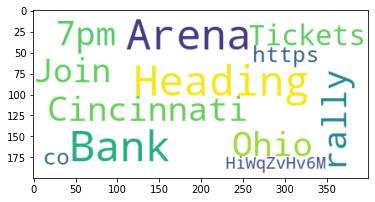

In [139]:
plt.imshow(word_cloud, interpolation="bilinear")

In [147]:
#Vecotrization of text: TF-IDF

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
tfidf=TfidfVectorizer(analyzer=)

In [155]:
model=tfidf.fit_transform(data['Text_2_NoDigit'])

In [158]:
model.shape

(265, 1502)

In [160]:
tfidf.get_feature_names()
tfidf.vocabulary_

{'if': 704,
 'the': 1308,
 'press': 1062,
 'would': 1488,
 'cover': 242,
 'me': 867,
 'accurately': 9,
 'honorably': 533,
 'have': 502,
 'far': 391,
 'less': 815,
 'reason': 1110,
 'to': 1337,
 'tweet': 1373,
 'sadly': 1158,
 'dont': 325,
 'know': 789,
 'that': 1307,
 'will': 1466,
 'ever': 371,
 'happen': 494,
 'am': 36,
 'thrilled': 1327,
 'nominate': 939,
 'dr': 329,
 'realbencarson': 1105,
 'as': 68,
 'our': 983,
 'next': 930,
 'secretary': 1181,
 'of': 958,
 'us': 1397,
 'dept': 295,
 'housing': 539,
 'and': 46,
 'urban': 1394,
 'development': 299,
 'httpstcoojkudfhpr': 642,
 'their': 1310,
 'country': 241,
 'doesnt': 315,
 'tax': 1291,
 'them': 1311,
 'or': 976,
 'build': 124,
 'massive': 863,
 'military': 891,
 'complex': 208,
 'in': 716,
 'middle': 887,
 'south': 1227,
 'china': 175,
 'sea': 1176,
 'think': 1318,
 'so': 1219,
 'did': 301,
 'ask': 69,
 'it': 754,
 'was': 1436,
 'ok': 966,
 'devalue': 298,
 'currency': 257,
 'making': 856,
 'hard': 498,
 'for': 419,
 'companies':

In [162]:
dtm1=pd.DataFrame(model.toarray(),columns=tfidf.get_feature_names())

In [166]:
dtm1.head() 
#DOUBLE BAMMMM
#successfully converted text to numbers according to their weights

,abc,ability,able,about,ac,accept,accepted,accomplish,according,accurately,...,xffaxff,year,years,yesterday,yet,york,you,your,youve,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### spaCy

<div>spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.<br>
    <ul>Features:
        <li>Tokenizations
            <li>POS
                <li>NER
                    <li>Lemmatization
                        <li>Text Classification
                            <li> https://spacy.io/usage/spacy-101
                                </ul>
    Calling the nlp object on a string of text will return a processed Doc.<br>
    When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.<br>
    
    eg: text1=nlp("jkshfksdhfkjshf")<br>
    



<div class="alert alert-success">
    import spacy

nlp = spacy.load("en_core_web_sm") <br>
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")<br>
for token in doc:<br>
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
    </div>

### POS: Spacy

In [170]:
import spacy

In [171]:
nlp=spacy.load("en_core_web_sm")

In [172]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

In [176]:
doc.text

"The quick brown fox jumped over the lazy dog's back."

In [179]:
for i in doc:
    print(i.text, i.lemma_, i.pos_,i.tag_,i.dep_,i.shape_,i.is_alpha,i.is_stop)

The the DET DT det Xxx True True
quick quick ADJ JJ amod xxxx True False
brown brown ADJ JJ amod xxxx True False
fox fox NOUN NN nsubj xxx True False
jumped jump VERB VBD ROOT xxxx True False
over over ADP IN prep xxxx True True
the the DET DT det xxx True True
lazy lazy ADJ JJ amod xxxx True False
dog dog NOUN NN poss xxx True False
's 's PART POS case 'x False True
back back NOUN NN pobj xxxx True True
. . PUNCT . punct . False False


In [180]:
#Visulaizing spacy:

In [181]:
from spacy import displacy

In [197]:
displacy.render(doc,style="dep",jupyter=True,options={'distance': 85})

### POS: NLTK

In [200]:
abc=nltk.pos_tag(word_tokenized)

In [202]:
print(abc)

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('Demoes', 'NNP'), ('Texting', 'NNP'), ('for', 'IN'), ('NLP', 'NNP'), ('using', 'VBG'), ('NLTK', 'NNP'), ('.', '.'), ('Full', 'NNP'), ('forms', 'NNS'), ('of', 'IN'), ('NLTK', 'NNP'), ('is', 'VBZ'), ('Natural', 'JJ'), ('Language', 'NNP'), ('Toolkit', 'NNP')]


### NER: spaCy

<div class="alert alert-success">
import spacy<br>

nlp = spacy.load("en_core_web_sm") <br>
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")<br>

for ent in doc.ents:<br>
    print(ent.text, ent.start_char, ent.end_char, ent.label_)<br>
    
    #For visualization:<br>
    displacy.serve(doc, style="ent")

In [235]:
doc1 = nlp("Wikipedia is a multilingual online encyclopedia.\
The website was created and is maintained as an open collaboration project by a community of volunteer editors, \
using a wiki-based editing system. It is the largest and most popular general reference work on the World Wide Web.")


In [236]:
for ent in doc1.ents:
    print((ent.text,ent.label_))

('the World Wide Web', 'EVENT')


In [240]:
for ent in doc1.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

the World Wide Web 256 274 EVENT


In [239]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [241]:
#Visualization

In [244]:
displacy.render(doc,style="ent")

### Sentiment Analysis

### VADER

<div> A tool for sentiment analysis. (Valence Aware Dictionary and Sentiment Reasoner)
    </div>

In [245]:
import nltk


In [246]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\.hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [248]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [249]:
a=SentimentIntensityAnalyzer()

In [303]:
txt1="This is a good phone, but camera is WORST . Display was ok. Sound is amazing.Performance was worthy. But it!"
txt2="This phone has GREATLY lost its cause of purpose!!!. Display is BRILLIANT. Sound is cracky and hazy. It is  not not worst!!!!!!!!!"
txt3=":>"

In [304]:
print (a.polarity_scores(txt3))

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4767}


### Running Sentiment Analysis over Amazon REview: DOUBLE BAMMMMMM!!!

In [305]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [320]:
amazon_data=pd.read_csv(r"C:\Users\.hp\Desktop\EdWisor\NLP\amazon_alexa.tsv",sep='\t')

In [321]:
amazon_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wr...",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the light...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [319]:
amazon_data.columns

Index(['label\treview', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [322]:
amazon_data_1=pd.DataFrame(amazon_data['verified_reviews'])

In [323]:
  amazon_data_1.head()

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wr..."
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the light..."
4,Music


In [324]:
#Cleaning the data:

In [325]:
amazon_data_1.isnull().sum()

verified_reviews    0
dtype: int64

### Sentiment Analysis:

In [327]:
from  nltk.sentiment.vader import SentimentIntensityAnalyzer

In [328]:
abcd=SentimentIntensityAnalyzer()

In [329]:
print(abcd.polarity_scores(amazon_data_1.verified_reviews[20]))

{'neg': 0.06, 'neu': 0.721, 'pos': 0.219, 'compound': 0.765}


In [330]:
amazon_data_1['Polarity_score']=amazon_data_1['verified_reviews'].apply(lambda x:abcd.polarity_scores(x))

In [331]:
amazon_data_1.head()

,verified_reviews,Polarity_score
0,Love my Echo!,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}"
1,Loved it!,"{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'compound': 0.636}"
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wr...","{'neg': 0.102, 'neu': 0.784, 'pos': 0.114, 'compound': -0.128}"
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the light...","{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9169}"
4,Music,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [333]:
amazon_data_1['compound']=amazon_data_1['Polarity_score'].apply(lambda x:x['compound'])

In [334]:
amazon_data_1.head()

,verified_reviews,Polarity_score,compound
0,Love my Echo!,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}",0.6696
1,Loved it!,"{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'compound': 0.636}",0.6360
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wr...","{'neg': 0.102, 'neu': 0.784, 'pos': 0.114, 'compound': -0.128}",-0.1280
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the light...","{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9169}",0.9169
4,Music,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000


In [336]:
amazon_data_1['Labels']=amazon_data_1['compound'].apply(lambda x:'Positive' if x>0 else 'Negative')

In [337]:
amazon_data_1.head()

,verified_reviews,Polarity_score,compound,Labels
0,Love my Echo!,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}",0.6696,Positive
1,Loved it!,"{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'compound': 0.636}",0.6360,Positive
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wr...","{'neg': 0.102, 'neu': 0.784, 'pos': 0.114, 'compound': -0.128}",-0.1280,Negative
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the light...","{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9169}",0.9169,Positive
4,Music,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Negative


In [338]:
p=0
n=0
for i in amazon_data_1.Labels:
    if i=='Positive':
        p=p+1
    else:
        n=n+1

In [354]:
P=(p/len(amazon_data_1['Labels'])*100)
N=(n/len(amazon_data_1['Labels'])*100)
print("Total positive reviews:",P,"Total negative reviews:",N)

Total positive reviews: 81.96825396825396 Total negative reviews: 18.03174603174603


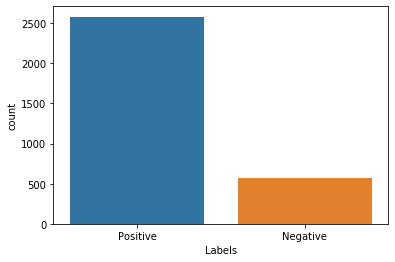

In [355]:
sns.countplot(amazon_data_1['Labels'],data=amazon_data_1)

### LDA

<div> Stands for Latent Dirichlet Allocation. Developed by Andrew Ng and friends in '03.<br>
    Used for Topic Modelling.<br>
    Analyses large text datasets using clustering.<br>
    We try to find "labels" if we have "unlabelled data".<br>
    Document >>> Topic >>> Words
    
    

In [356]:
data3=pd.read_excel(r"C:\Users\.hp\Desktop\EdWisor\NLP\tweets.xlsx")

In [357]:
data3.head()

,Tweet,Class
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes


In [358]:
data3.shape

(265, 2)

In [359]:
#Pre-processing

In [360]:
from sklearn.feature_extraction.text import CountVectorizer

In [361]:
cv=CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [362]:
dtm=cv.fit_transform(data3.Tweet)

In [363]:
dtm



<265x441 sparse matrix of type '<class 'numpy.int64'>'
	with 1889 stored elements in Compressed Sparse Row format>

In [364]:
cv.vocabulary_

{'cover': 83,
 'far': 136,
 'don': 108,
 'know': 211,
 'happen': 168,
 'nominate': 276,
 'dr': 112,
 'secretary': 339,
 'https': 186,
 'country': 82,
 'doesn': 106,
 'tax': 367,
 'military': 256,
 'china': 64,
 'think': 379,
 'did': 102,
 'making': 243,
 'hard': 170,
 'companies': 75,
 'going': 155,
 'foxnews': 145,
 'running': 330,
 'donald': 109,
 'trump': 395,
 'great': 163,
 '00': 0,
 'enjoy': 123,
 'green': 165,
 'party': 292,
 'just': 206,
 'pennsylvania': 294,
 'losing': 232,
 'votes': 409,
 'wisconsin': 424,
 'scam': 336,
 'money': 264,
 'expensive': 128,
 'mistake': 261,
 'united': 399,
 'states': 353,
 'open': 286,
 'business': 48,
 'prior': 312,
 'sell': 341,
 'product': 313,
 'border': 47,
 'make': 241,
 'leaving': 219,
 'wrong': 435,
 'soon': 347,
 'strong': 357,
 'new': 271,
 'plant': 302,
 'businesses': 49,
 'watching': 417,
 'saturday': 334,
 'night': 275,
 'live': 225,
 'totally': 391,
 'biased': 43,
 'funny': 150,
 'worse': 433,
 'sad': 331,
 'vpe': 412,
 'mike_pence'

In [365]:
tf1_model_DF=pd.DataFrame(dtm.toarray(),columns=cv.get_feature_names())
tf1_model_DF

,00,000,00pm,100,11,12,12pm,15,16,30pm,...,workers,working,worse,wow,wrong,wsj,year,years,yesterday,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Starting with LDA

In [367]:
from sklearn.decomposition import LatentDirichletAllocation

In [368]:
lda=LatentDirichletAllocation(n_components=5,random_state=40)

In [369]:
lda_model=lda.fit(dtm)

In [370]:
lda_model

LatentDirichletAllocation(n_components=5, random_state=40)

In [386]:
lda_model.components_

array([[0.20000362, 0.20000163, 0.2036001 , ..., 0.20000424, 2.1993494 ,
        0.20000224],
       [0.20000434, 0.20000193, 3.19637653, ..., 0.2000054 , 0.2000118 ,
        0.2000026 ],
       [0.20000583, 2.19998984, 0.20000662, ..., 0.20000738, 1.19987462,
        2.19998604],
       [3.19997812, 0.2000029 , 0.20000746, ..., 1.19992782, 0.20001672,
        0.2000041 ],
       [0.2000081 , 0.20000371, 0.20000929, ..., 1.20005515, 0.20074746,
        0.20000502]])

In [385]:
len(lda_model.components_)

5

In [384]:
cv.get_feature_names()[200:900:100]

['jeffzeleny', 'plan', 'university']

In [387]:
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['ohio', 'rally', 'new', 'icymi', 'make', 'clinton', 'live', 'draintheswamp', 'join', 'america', 'rt', 'great', 'watch', 'thank', 'https']


THE TOP 15 WORDS FOR TOPIC #1
['draintheswamp', 'colorado', 'donald', 'arizona', 'rapids', 'florida', 'just', 'president', 'thank', 'trump', 'going', 'today', 'join', 'tomorrow', 'https']


THE TOP 15 WORDS FOR TOPIC #2
['workers', 'know', 'news', 'vote', 'terrible', 'big', 'state', 'carrier', 'today', 'make', 'hillary', 'indiana', 'states', 'people', 'great']


THE TOP 15 WORDS FOR TOPIC #3
['watching', 'election', 'place', 'failing', 'people', 'bad', 'time', 'night', 'just', 'states', 'did', 'nytimes', 'win', 'trump', 'great']


THE TOP 15 WORDS FOR TOPIC #4
['president', 'business', 'great', 'time', 'election', 'clinton', 'change', 'results', 'cnn', 'tax', 'called', 'going', 'country', 'hillary', 'just']




In [388]:
# attaching topics to original dataset

In [389]:
topics_op=lda.transform(dtm)

In [391]:
topics_op

array([[0.03333565, 0.03346985, 0.86509069, 0.03450584, 0.03359797],
       [0.04040328, 0.83919465, 0.04039126, 0.04000482, 0.040006  ],
       [0.0250091 , 0.02503511, 0.02541725, 0.27208839, 0.65245015],
       ...,
       [0.8659177 , 0.03394891, 0.03335663, 0.03344168, 0.03333508],
       [0.83879611, 0.04093186, 0.04007172, 0.04000376, 0.04019656],
       [0.0172779 , 0.93259666, 0.01671457, 0.01673614, 0.01667472]])

In [393]:
topics_op[0].argmax()

2

In [394]:
data3['Topics']=topics_op.argmax(axis=1)

In [396]:
data3.head(20)

,Tweet,Class,Topics
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,2
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,1
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,4
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,4
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,3
5,The Green Party just dropped its recount suit in Pennsylvania and is losing votes in Wisconsin r...,Yes,1
6,expensive mistake! THE UNITED STATES IS OPEN FOR BUSINESS,Yes,4
7,"these companies are able to move between all 50 states, with no tax or tariff being charged. Ple...",Yes,2
8,"wanting to sell their product, cars, A.C. units etc., back across the border. This tax will make...",Yes,4
9,"without retribution or consequence, is WRONG! There will be a tax on our soon to be strong borde...",Yes,4
